# Funciones

In [1]:
import requests
import pandas as pd
import re

In [2]:
from bs4 import BeautifulSoup

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
def trail_de_los_filos(accessUrl):
  # Make the request
  response = requests.get(url)
  df1 = pd.DataFrame()
  # Verificar que la solicitud fue exitosa
  if response.status_code == 200:
    # Parsear el contenido HTML
    soup = BeautifulSoup(response.content, 'html.parser')
        # Encontrar la tabla que contiene los resultados de la carrera

      # Esto puede variar según la estructura de la página web. Asegúrate de identificar la tabla correcta.
    tables = soup.find_all('table')  # Puedes necesitar refinar esto para seleccionar la tabla correcta

    # Extraer los encabezados de la tabla
    headers = [header.text for header in tables[0].find_all('th')]
    if headers:
      headers.pop(0)

    # Extraer las filas de la tabla
    rows = []
    for table in tables:
      for row in table.find_all('tr')[2:]:  # Omitir el primer <tr> ya que contiene los encabezados
          cells = row.find_all('td')
          row_data = [cell.text.strip() for cell in cells]
          rows.append(row_data)

      # Crear un DataFrame de pandas con los datos extraídos
    df = pd.DataFrame(rows, columns=headers)

    #datos_divididos = df['Categoria'].str.split('-', expand=True)
    #nombres_columnas=['Distancia', 'Sexo', 'Categoria2']
    #datos_divididos.columns = nombres_columnas

    # Concatenar las nuevas columnas al DataFrame original
    #df1 = pd.concat([df, datos_divididos], axis=1)
    #df1.drop(['Categoria'], inplace=True, axis=1)
  return df


In [5]:
# Crear una función para asignar niveles
def asignar_nivel(grupo):
    n = len(grupo)
    grupo = grupo.sort_values(by='tiempo_minutos', ascending=True).copy()
    if n <= 3:
      grupo['nivel'] = 'Elite'
    else:
      grupo['nivel'] = 'Principiante'
      niveles = ['Elite','Avanzado', 'Intermedio']
      diff=grupo.iloc[-1]['tiempo'] - grupo.iloc[0]['tiempo']
      for i in range(2, -1, -1):
        delta_tiempo=(grupo.iloc[0]['tiempo']+(diff/4)*(i+1))
        aux = grupo[grupo['tiempo'] < delta_tiempo].copy()
        aux['nivel']=niveles[i]
        grupo.update(aux)

    return grupo

In [6]:
# Función para identificar outliers
def encontrar_outliers(data):
    Q1 = data['tiempo_minutos'].quantile(0.25)
    Q3 = data['tiempo_minutos'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #outliers = data[(data < lower_bound) | (data > upper_bound)]
    data = data[(data['tiempo_minutos'] >= lower_bound) & (data['tiempo_minutos'] <= upper_bound)]
    return data


# Acceso al trail de los filos

In [7]:
df_trail = pd.DataFrame()

Edicion 2019

In [8]:
url = 'https://cronometrajeinstantaneo.com/resultados/trail-de-los-filos---cab---2019/'

In [9]:
dfaux = trail_de_los_filos(url)

In [10]:
df_trail = pd.concat([df_trail, dfaux], ignore_index=True)

Edicion 2020

In [11]:
url = 'https://cronometrajeinstantaneo.com/resultados/2da-edicion-trail-de-los-filos---cab---2020/generales?fbclid=IwAR0HlzvRHDJp6sMqXeXMJY2oGMTbNnEUn8Mnl38-pWRL6Qo93T8FF3oMJd8'

In [12]:
dfaux = trail_de_los_filos(url)

In [13]:
df_trail = pd.concat([df_trail, dfaux], ignore_index=True)

Edicion 2021

In [14]:
url = 'https://cronometrajeinstantaneo.com/resultados/3ra-edicion-trail-de-los-filos---cab---2021/generales?fbclid=IwAR3UqkFd655EG2WNACAPg46KSrTe_oqdHwv4XQPBm-CbqAkpkTR6gc9U358'

In [15]:
dfaux = trail_de_los_filos(url)

In [16]:
df_trail = pd.concat([df_trail, dfaux], ignore_index=True)

Edicion 2022

In [17]:
url = 'https://cronometrajeinstantaneo.com/resultados/4ta-edicion-trail-de-los-filos---cab---2022/generales'

In [18]:
dfaux = trail_de_los_filos(url)

In [19]:
df_trail = pd.concat([df_trail, dfaux], ignore_index=True)

Edidion 2023

In [20]:
url = 'https://cronometrajeinstantaneo.com/resultados/5ta-edicion-trail-de-los-filos-cab-2023'

In [21]:
dfaux = trail_de_los_filos(url)

In [22]:
df_trail = pd.concat([df_trail, dfaux], ignore_index=True)

Edicion 2024

In [23]:
url = 'https://cronometrajeinstantaneo.com/resultados/6ta-edicion-trail-de-los-filos-cab-2024/generales'

In [24]:
dfaux = trail_de_los_filos(url)
df_trail = pd.concat([df_trail, dfaux], ignore_index=True)

In [25]:
df_trail=df_trail.rename(columns={'Pos.Cat.':'posicion'})

# Preparar los datos

In [26]:
patron = '(\d+)([kK][mM]) - ([a-zA-Z]+)(\D+)(\d+)'
regex = re.compile(patron)
df_trail['distancia']=df_trail.Categoria.str.extract(regex)[0]
df_trail['sexo']=df_trail.Categoria.str.extract(regex)[2]
df_trail['edad']=df_trail.Categoria.str.extract(regex)[4]
df_trail = df_trail.drop(df_trail[(df_trail['sexo']!='Masculino')&(df_trail['sexo']!='Femenino')].index)

In [27]:
df_trail_recortado = df_trail.drop(['Pos.Gral.', 'Pos.Sexo', 'Nº', 'Nombre', 'Categoria','Localidad', 'Llegada 14km', 'Penas Bonus (seg)',
       'Diferencia primero', 'Diferencia anterior', 'Llegada', 'Penas Bonus','Llegada 14KM', 'Llegada 15KM'], axis=1)
df_trail_recortado = df_trail_recortado.rename(columns={'Total':'tiempo'})
df_trail_recortado = df_trail_recortado[(df_trail_recortado['tiempo']!='DNF')&(df_trail_recortado['tiempo']!='DNS')&(df_trail_recortado['tiempo']!='DSQ')]
df_trail_recortado['tiempo']= pd.to_timedelta(df_trail_recortado['tiempo'])
df_trail_recortado['edad']=df_trail_recortado['edad'].astype(int)


In [28]:
df_trail_recortado['distancia']=df_trail_recortado['distancia'].astype(int)

In [29]:
# Crear la nueva columna 'categoria' usando np.select
df_trail_recortado['categoria']=pd.cut(x=df_trail_recortado['edad'], bins=[0, 29, 39, 49, 59, 100], labels=[1, 2, 3, 4, 5])

In [30]:
df_trail_recortado['tiempo_minutos']=df_trail_recortado['tiempo'].dt.total_seconds() / 60

In [31]:
df_trail_recortado = df_trail_recortado.groupby(['sexo','distancia','categoria']).apply(asignar_nivel).reset_index(drop=True)

In [32]:
df_trail_recortado=df_trail_recortado.drop(['posicion', 'edad'], axis=1)

# Algunos graficos

In [33]:
aux=df_trail_recortado[df_trail_recortado['sexo']=='Femenino']

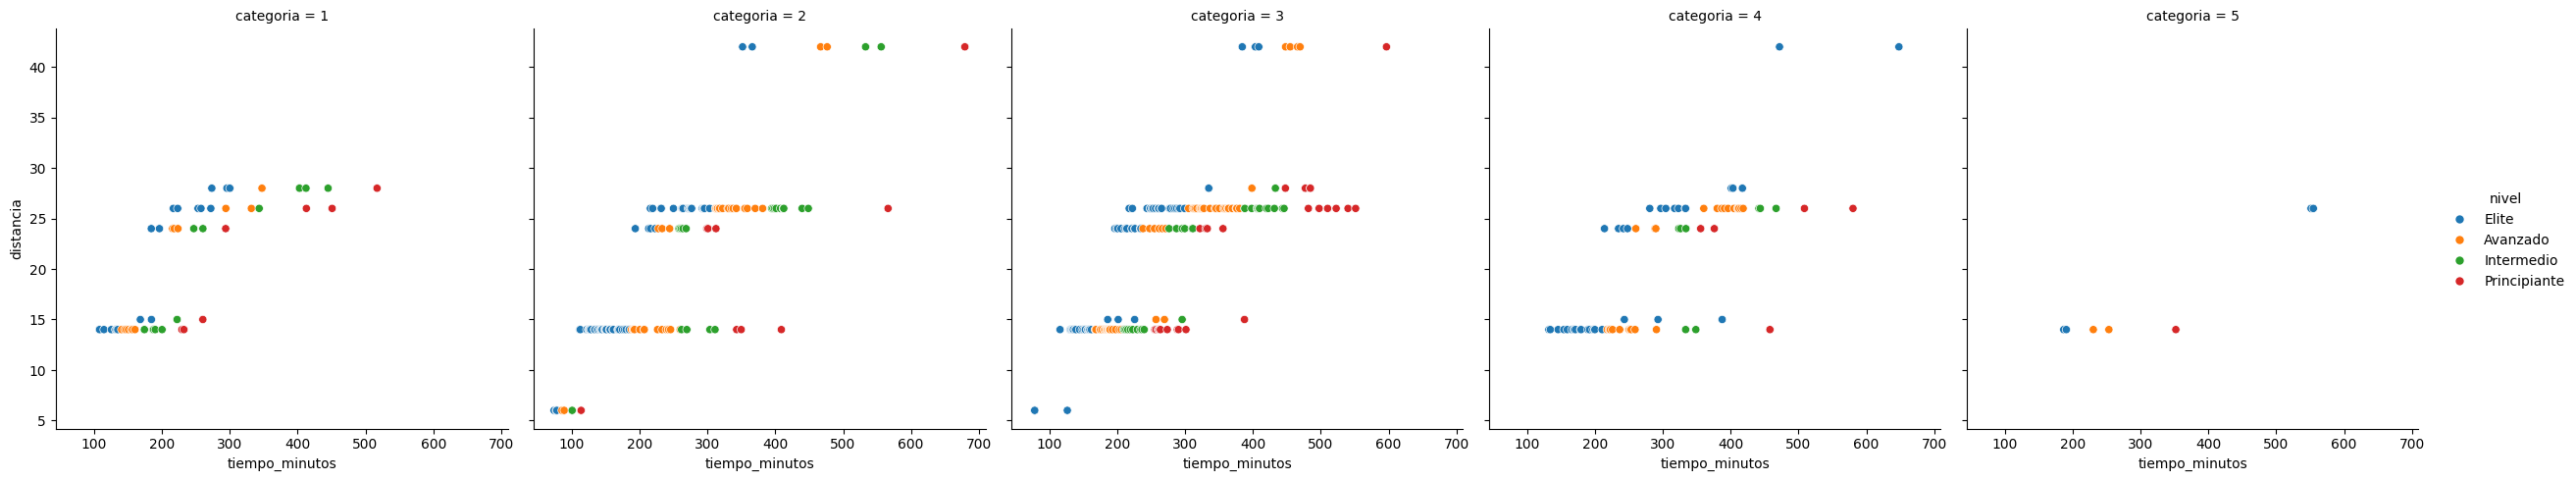

In [34]:
sns.relplot(aux,x='tiempo_minutos',y='distancia',col='categoria', hue='nivel', kind="scatter")

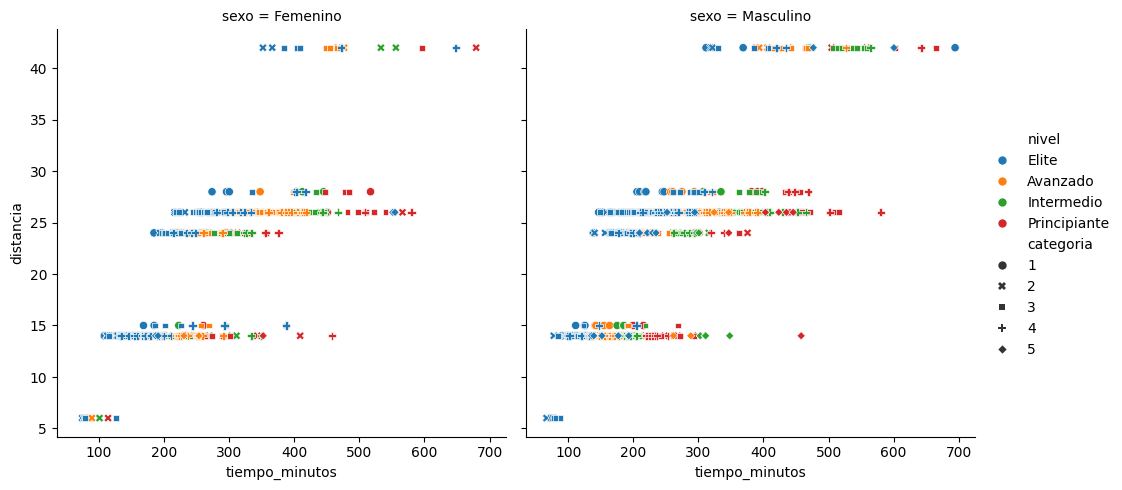

In [35]:
sns.relplot(df_trail_recortado,x='tiempo_minutos',y='distancia',col='sexo', hue='nivel', style="categoria", kind="scatter")

[]

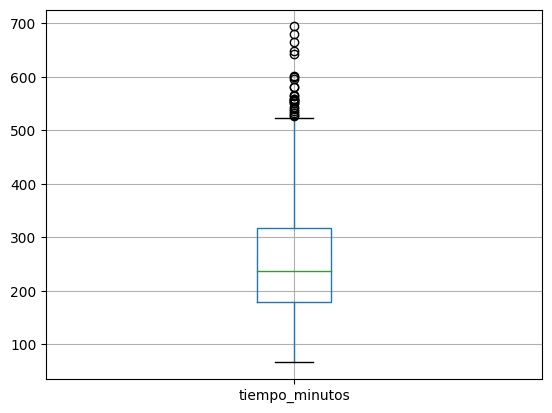

In [36]:
b_plot = df_trail_recortado.boxplot(column = 'tiempo_minutos')
b_plot.plot()

# Borrar outliers

In [37]:
# Filtrar los outliers
df_trail_sin_outliers = encontrar_outliers(df_trail_recortado)

In [38]:
df_trail_sin_outliers = df_trail_sin_outliers.groupby(['sexo','distancia','categoria']).apply(asignar_nivel).reset_index(drop=True)

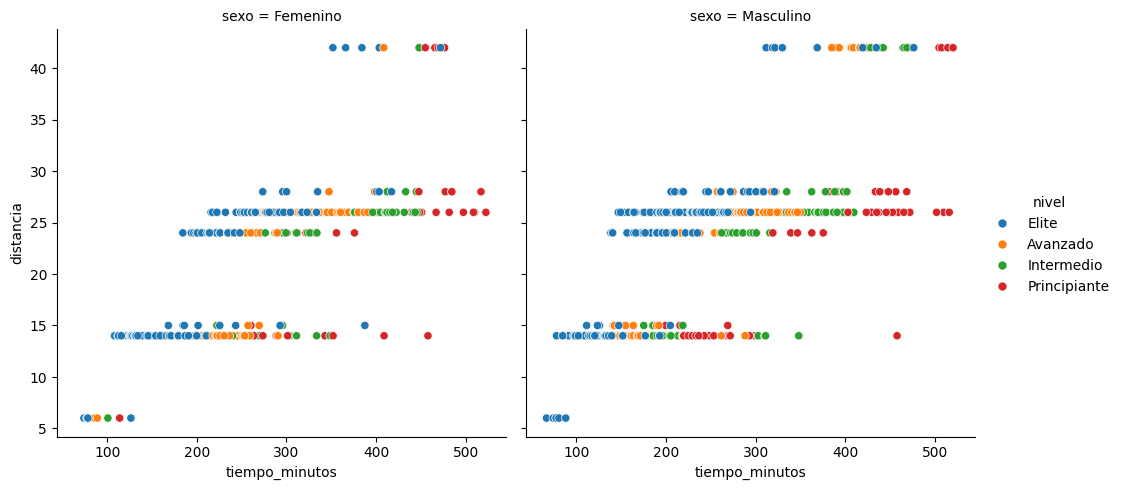

In [39]:
sns.relplot(df_trail_sin_outliers,x='tiempo_minutos',y='distancia',col='sexo', hue='nivel', kind="scatter")

[]

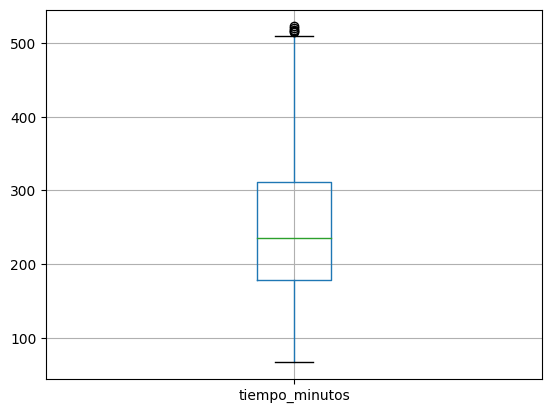

In [40]:
b_plot = df_trail_sin_outliers.boxplot(column = 'tiempo_minutos')
b_plot.plot()

# Acceso Fiambala Desert Trail

In [41]:
import json

In [42]:
def fiambala_desert_trail(url):
  response = requests.get(url)
  data_json = response.json()
  df = pd.DataFrame(data_json['data'])
  return df

Edicion 2022

In [43]:
df_fiambala = pd.DataFrame()

In [44]:
for i in range(3, 7):
  url = 'https://mistiempos.com.ar/clasificaciones/data?evento=2&carrera='+str(i)+'&categoria=0'
  dfaux = fiambala_desert_trail(url)
  df_fiambala = pd.concat([df_fiambala, dfaux], ignore_index=True)

Edicion 2023

In [45]:
for i in range(20, 24):
  url = 'https://mistiempos.com.ar/clasificaciones/data?evento=102&carrera='+str(i)+'&categoria=0'
  dfaux = fiambala_desert_trail(url)
  df_fiambala = pd.concat([df_fiambala, dfaux], ignore_index=True)

# Preparar los datos

In [46]:
df_fiambala.columns

Index(['id', 'carrera_id', 'posicion', 'created_at', 'updated_at',
       'inscripcion_id', 'dorsal', 'documento', 'name', 'carrera', 'categoria',
       'tiempo_total', 'action'],
      dtype='object')

In [47]:
patron = '(\D+)(\d+)'
regex = re.compile(patron)
df_fiambala['distancia']=df_fiambala.carrera.str.extract(regex)[1]
df_fiambala['distancia']=df_fiambala['distancia'].astype(int)

In [48]:
df_fiambala['sexo'] = df_fiambala['categoria'].replace({
    r'^Caballeros.*': 'Masculino',
    r'^Masculino.*': 'Masculino',
    r'^Damas.*': 'Femenino',
    r'^Femenino.*': 'Femenino'
}, regex=True)

In [49]:
patron = '(\w+) ([A-Z]?\d?)'
regex = re.compile(patron)

In [50]:
df_fiambala['categoria'] = df_fiambala.categoria.str.extract(regex)[1]

In [51]:
# Definir el diccionario de mapeo
mapeo = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}

# Reemplazar los valores de la columna 'letras'
df_fiambala['categoria'] = df_fiambala['categoria'].replace(mapeo)

In [52]:
df_fiambala_recortado=df_fiambala.drop(['id', 'carrera_id', 'created_at', 'updated_at',
       'inscripcion_id', 'dorsal', 'documento', 'name', 'carrera', 'posicion',
       'action'], axis=1)
df_fiambala_recortado=df_fiambala_recortado.rename(columns={'tiempo_total':'tiempo'})

In [53]:
df_fiambala_recortado['tiempo']= pd.to_timedelta(df_fiambala_recortado['tiempo'])
df_fiambala_recortado['tiempo_minutos']=df_fiambala_recortado['tiempo'].dt.total_seconds() / 60

In [54]:
df_fiambala_recortado.to_csv('fiambala.csv')

In [55]:
# Aplicar la función por cada grupo de categoría
df_fiambala_recortado = df_fiambala_recortado.groupby(['sexo','distancia','categoria']).apply(asignar_nivel).reset_index(drop=True)

# Algunos graficos

In [56]:
aux=df_fiambala_recortado[df_fiambala_recortado['sexo']=='Femenino']

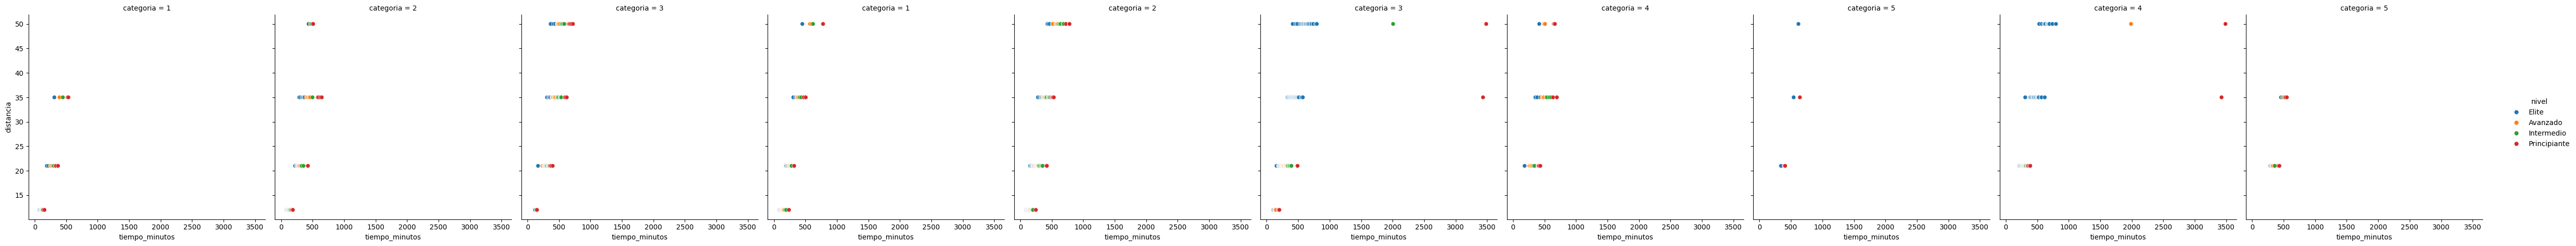

In [57]:
sns.relplot(aux,x='tiempo_minutos',y='distancia',col='categoria', hue='nivel', kind="scatter")

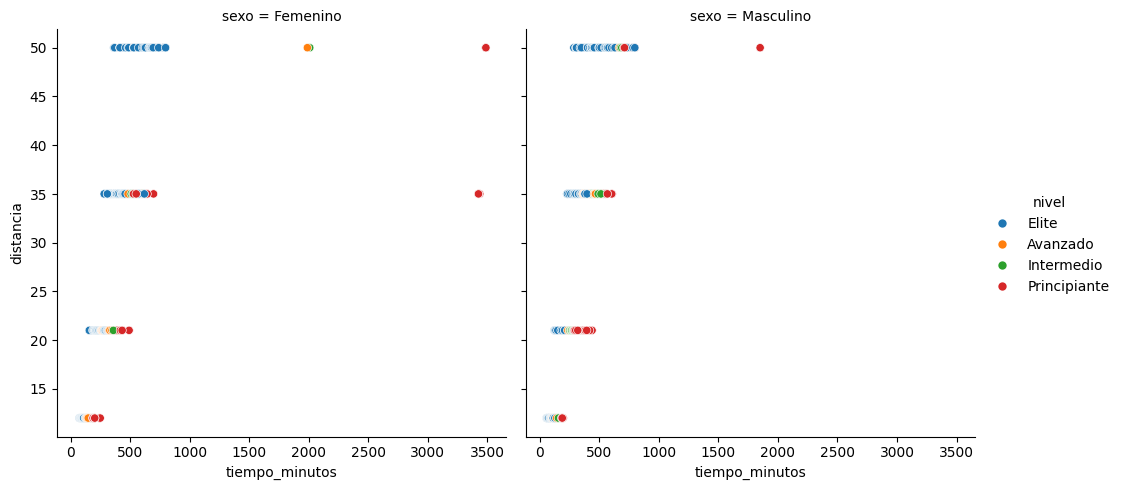

In [58]:
sns.relplot(df_fiambala_recortado,x='tiempo_minutos',y='distancia',col='sexo', hue='nivel', kind="scatter")

[]

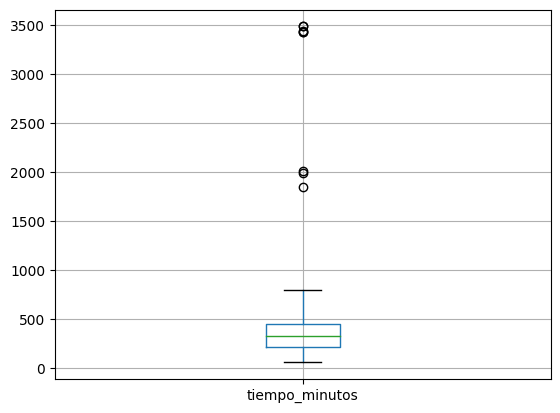

In [59]:
b_plot = df_fiambala_recortado.boxplot(column = 'tiempo_minutos')
b_plot.plot()

# Borrar outliers

In [60]:
# Filtrar los outliers
df_fiambala_sin_outliers = encontrar_outliers(df_fiambala_recortado)

In [61]:
# Aplicar la función por cada grupo de categoría
df_fiambala_sin_outliers = df_fiambala_sin_outliers.groupby(['sexo','distancia','categoria']).apply(asignar_nivel).reset_index(drop=True)

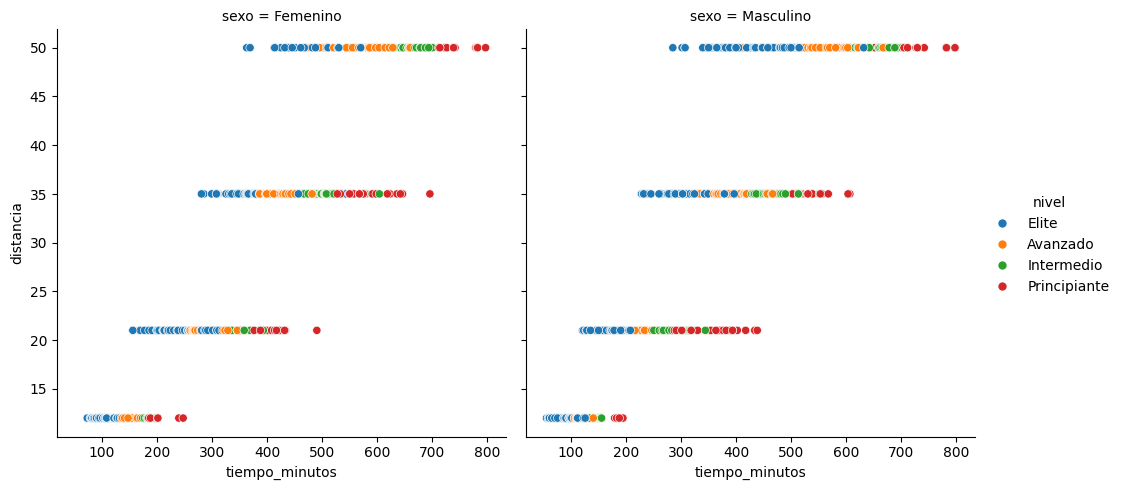

In [62]:
sns.relplot(df_fiambala_sin_outliers,x='tiempo_minutos',y='distancia',col='sexo', hue='nivel', kind="scatter")

[]

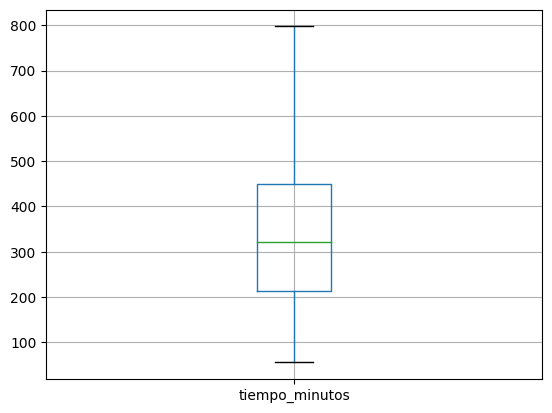

In [63]:
b_plot = df_fiambala_sin_outliers.boxplot(column = 'tiempo_minutos')
b_plot.plot()

# Acceso a K42

In [64]:
import pandas as pd
import re

In [65]:
urls={'https://github.com/marian1978/prueba/raw/main/2017-K42-15km.xlsx':15,
      'https://github.com/marian1978/prueba/raw/main/2017-K42-42km.xlsx':42,
      'https://github.com/marian1978/prueba/raw/main/2018-K42-42km.xlsx':42,
      'https://github.com/marian1978/prueba/raw/main/2019-K42-15km.xlsx':15,
      'https://github.com/marian1978/prueba/raw/main/2019-K42-42km.xlsx':42,
      'https://github.com/marian1978/prueba/raw/main/2022-K42-15km.xlsx':15,
      'https://github.com/marian1978/prueba/raw/main/2022-K42-42km.xlsx':42}

# Preparar los datos

In [66]:
patron = '(\d+) (\d+) (\d+) (\D+)(\d+) (\d+) ([A-Z]) (\d+:\d+:\d+) (\d+:\d+)(\D?)'

In [67]:
regex = re.compile(patron)

In [68]:
df_k42 = pd.DataFrame()

In [69]:
for url, distancia in urls.items():
  archivo = pd.read_excel(url)
  df = pd.DataFrame(archivo)
  df['pos_categoria']=archivo.Datos.str.extract(regex)[2]
  df['edad']=archivo.Datos.str.extract(regex)[5]
  df['sexo']=archivo.Datos.str.extract(regex)[6]
  df['tiempo']=archivo.Datos.str.extract(regex)[7]
  df['distancia']=distancia
  df_k42 = pd.concat([df_k42,df], axis=0, ignore_index=True)

In [70]:
df_k42=df_k42.dropna()

In [71]:
df_k42['edad']=df_k42['edad'].astype(int)

In [72]:
# Crear la nueva columna 'categoria' usando np.select
df_k42['categoria']=pd.cut(x=df_k42['edad'], bins=[0, 29, 39, 49, 59, 100], labels=[1, 2, 3, 4, 5])

In [73]:
# Reemplazar los valores de la columna 'letras'
df_k42['sexo'] = df_k42['sexo'].replace(['M', 'F'], ['Masculino', 'Femenino'])

In [74]:
df_k42.isnull().sum()

Datos            0
pos_categoria    0
edad             0
sexo             0
tiempo           0
distancia        0
categoria        0
dtype: int64

In [75]:
df_k42=df_k42.rename(columns={'pos_categoria':'posicion'})

In [76]:
df_k42_recortado=df_k42.drop(['Datos', 'posicion', 'edad'], axis=1)

In [77]:
df_k42_recortado['tiempo']= pd.to_timedelta(df_k42_recortado['tiempo'])
df_k42_recortado['tiempo_minutos']=df_k42_recortado['tiempo'].dt.total_seconds() / 60

In [78]:
# Aplicar la función por cada grupo de categoría
df_k42_recortado = df_k42_recortado.groupby(['sexo','distancia','categoria']).apply(asignar_nivel).reset_index(drop=True)

# Algunos graficos

In [79]:
aux=df_k42_recortado[df_k42_recortado['sexo']=='Femenino']

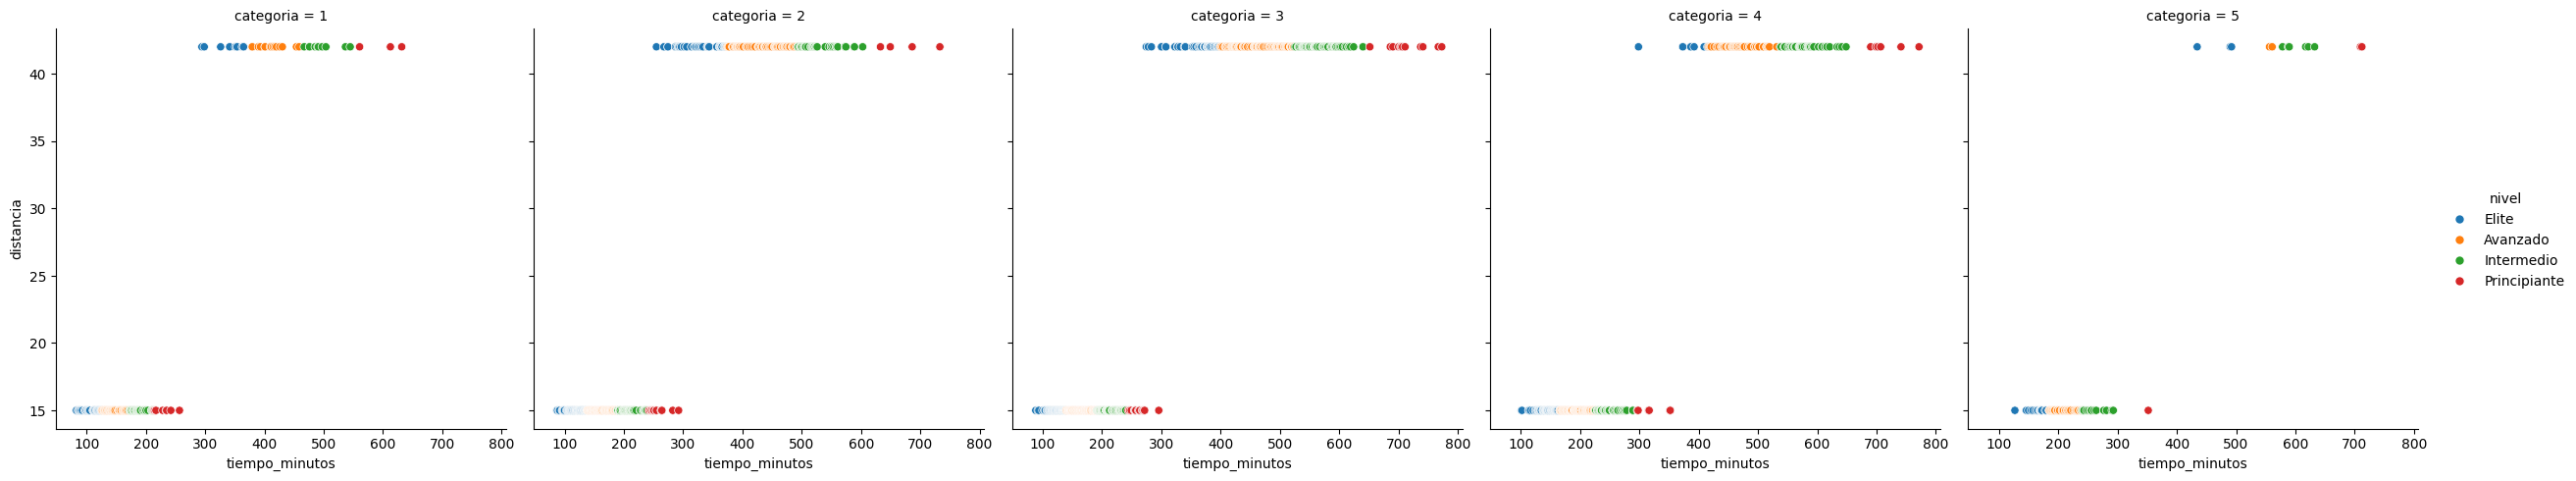

In [80]:
sns.relplot(aux,x='tiempo_minutos',y='distancia',col='categoria', hue='nivel', kind="scatter")

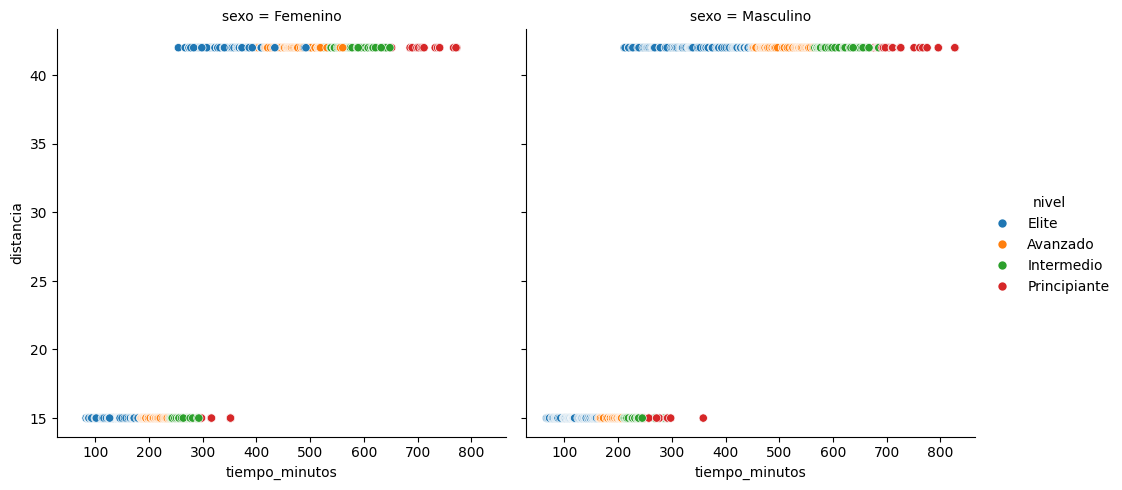

In [81]:
sns.relplot(df_k42_recortado,x='tiempo_minutos',y='distancia',col='sexo', hue='nivel', kind="scatter")

[]

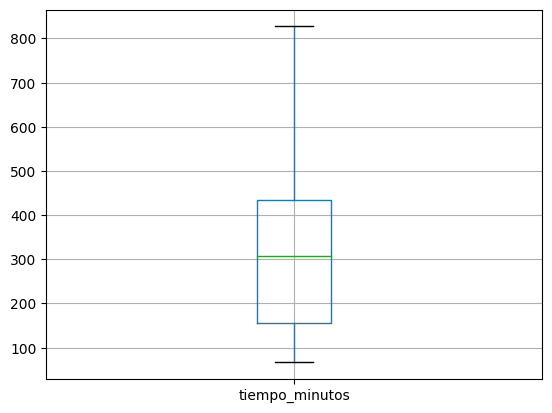

In [82]:
b_plot = df_k42_recortado.boxplot(column = 'tiempo_minutos')
b_plot.plot()

# Borrar outliers

In [83]:
# Filtrar los outliers
df_k42_sin_outliers = encontrar_outliers(df_k42_recortado)

In [84]:
# Aplicar la función por cada grupo de categoría
df_k42_sin_outliers = df_k42_sin_outliers.groupby(['sexo','distancia','categoria']).apply(asignar_nivel).reset_index(drop=True)

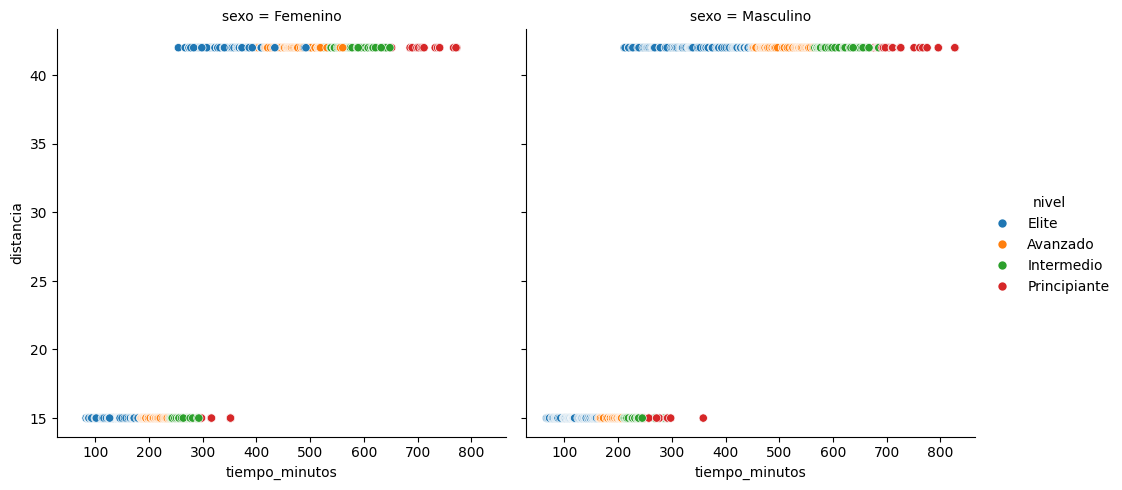

In [85]:
sns.relplot(df_k42_sin_outliers,x='tiempo_minutos',y='distancia',col='sexo', hue='nivel', kind="scatter")

# Junto todos los resultados

In [86]:
df_completo=pd.concat([df_trail_sin_outliers, df_fiambala_sin_outliers, df_k42_sin_outliers])
df_completo=df_completo.reset_index(drop=True)

In [87]:
df_completo.isnull().sum()

tiempo            0
distancia         0
sexo              0
categoria         0
tiempo_minutos    0
nivel             0
dtype: int64

[]

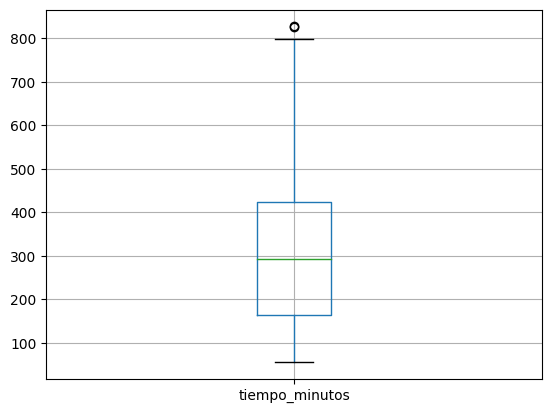

In [88]:
b_plot = df_completo.boxplot(column = 'tiempo_minutos')
b_plot.plot()

# Borrar outliers

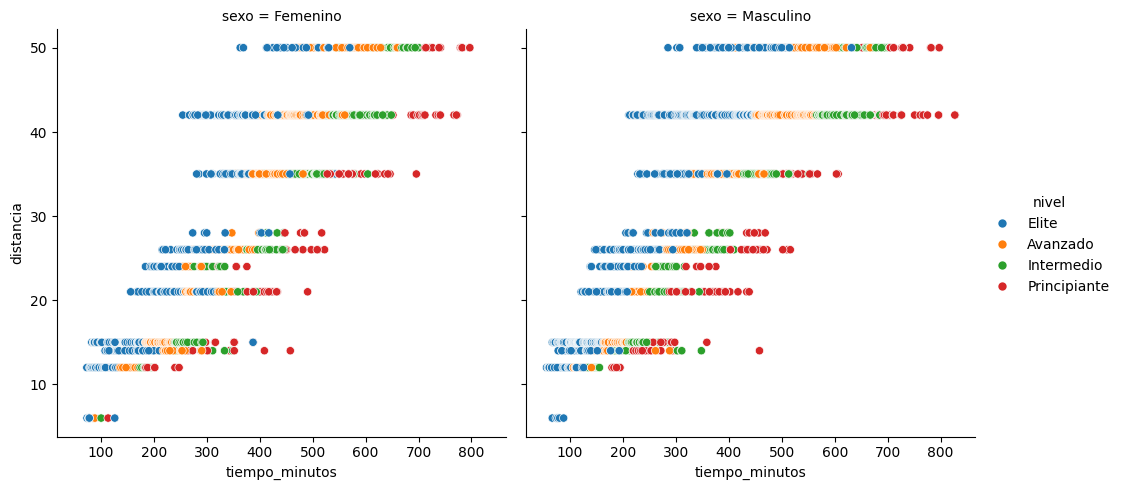

In [89]:
sns.relplot(df_completo,x='tiempo_minutos',y='distancia',col='sexo', hue='nivel', kind="scatter")

In [90]:
# Filtrar los outliers
df_completo_sin_outliers = encontrar_outliers(df_completo)

In [91]:
# Aplicar la función por cada grupo de categoría
df_completo_sin_outliers = df_completo_sin_outliers.groupby(['sexo','distancia','categoria']).apply(asignar_nivel).reset_index(drop=True)

[]

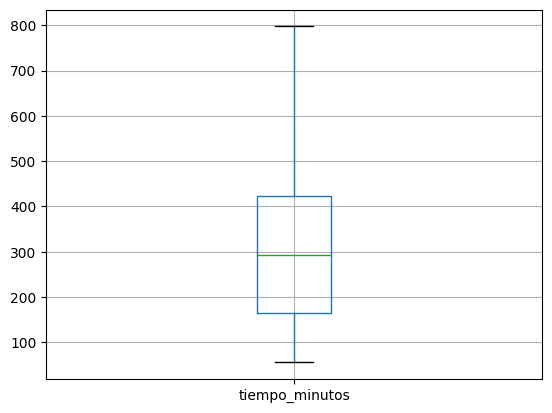

In [92]:
b_plot = df_completo_sin_outliers.boxplot(column = 'tiempo_minutos')
b_plot.plot()

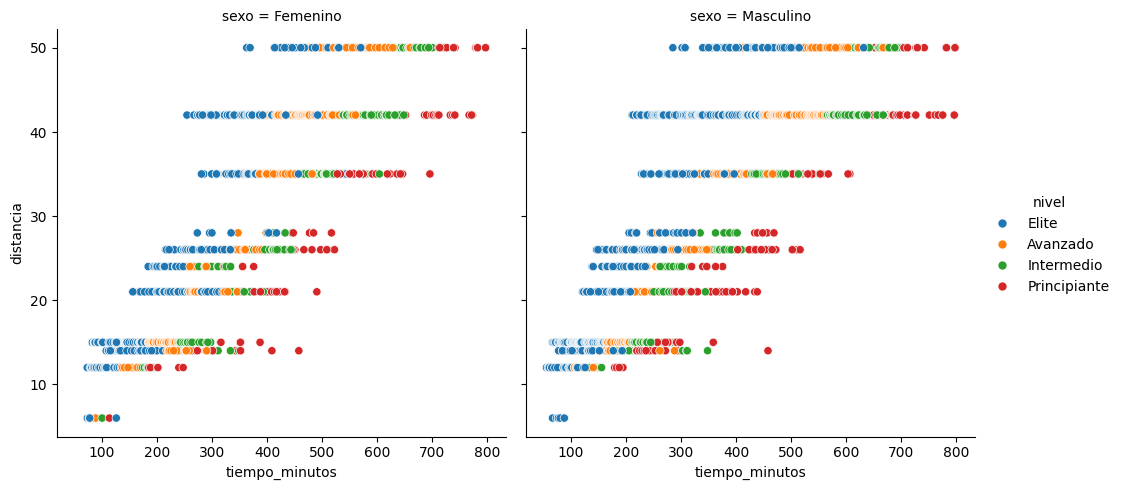

In [93]:
sns.relplot(df_completo_sin_outliers,x='tiempo_minutos',y='distancia',col='sexo', hue='nivel', kind="scatter")

# Encoding de variables categoricas

In [94]:
df=df_completo_sin_outliers.drop('tiempo', axis=1)

In [95]:
df=pd.get_dummies(df)

In [96]:
df_15 = df[df['distancia']==15]

In [97]:
df.corr(numeric_only=True)

,distancia,tiempo_minutos,sexo_Femenino,sexo_Masculino,categoria_1,categoria_2,categoria_3,categoria_4,categoria_5,categoria_1,categoria_2,categoria_3,categoria_4,categoria_5,nivel_Avanzado,nivel_Elite,nivel_Intermedio,nivel_Principiante
distancia,1.000000,0.863092,-0.297180,0.297180,-0.112984,0.004338,0.065621,0.002300,-0.004094,-0.079376,-0.038201,0.060424,0.040642,-0.002818,0.059044,-0.162742,0.110416,0.019019
tiempo_minutos,0.863092,1.000000,-0.125395,0.125395,-0.178715,-0.101893,0.053333,0.078172,0.068128,-0.073682,-0.014765,0.104992,0.102678,0.040637,0.031439,-0.423595,0.331517,0.240906
sexo_Femenino,-0.297180,-0.125395,1.000000,-1.000000,-0.026804,-0.011789,-0.010566,-0.019911,-0.061623,0.060242,0.063637,0.058722,0.033509,0.004636,-0.014636,-0.011452,0.021891,0.018528
sexo_Masculino,0.297180,0.125395,-1.000000,1.000000,0.026804,0.011789,0.010566,0.019911,0.061623,-0.060242,-0.063637,-0.058722,-0.033509,-0.004636,0.014636,0.011452,-0.021891,-0.018528
categoria_1,-0.112984,-0.178715,-0.026804,0.026804,1.000000,-0.183108,-0.217163,-0.144276,-0.069013,-0.042115,-0.066644,-0.068110,-0.050171,-0.024333,-0.045245,0.023773,-0.001253,0.051792
categoria_2,0.004338,-0.101893,-0.011789,0.011789,-0.183108,1.000000,-0.388365,-0.258017,-0.123420,-0.075316,-0.119183,-0.121805,-0.089723,-0.043517,0.033483,-0.000631,-0.019070,-0.039502
categoria_3,0.065621,0.053333,-0.010566,0.010566,-0.217163,-0.388365,1.000000,-0.306004,-0.146374,-0.089324,-0.141349,-0.144459,-0.106410,-0.051610,0.026149,0.032681,-0.042807,-0.051800
categoria_4,0.002300,0.078172,-0.019911,0.019911,-0.144276,-0.258017,-0.306004,1.000000,-0.097247,-0.059344,-0.093908,-0.095974,-0.070695,-0.034288,0.017672,-0.036760,0.022769,-0.001482
categoria_5,-0.004094,0.068128,-0.061623,0.061623,-0.069013,-0.123420,-0.146374,-0.097247,1.000000,-0.028387,-0.044920,-0.045908,-0.033817,-0.016401,-0.032902,0.019918,0.006414,0.020108
categoria_1,-0.079376,-0.073682,0.060242,-0.060242,-0.042115,-0.075316,-0.089324,-0.059344,-0.028387,1.000000,-0.027412,-0.028015,-0.020636,-0.010009,-0.016777,0.004954,-0.005285,0.035088
